# Preprocessing

In [28]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import csv
import seeg_library as slib
import seeg_constants as CONST

In [2]:
# Constants
patient = 'p8'
event = "key"  # On what even to align stroop tasks. Choose "start" (trial start), "stim" (stimulus onset), or "key" (keypress)
alignment = "center"  # Choose "center" or "left"
width = 1000  # Trials will be this long (in ms)
start_time = 0  # Start measuring width from this time

In [3]:
# Collect patient metadata
subject = CONST.Subject(patient)
region = subject.amcc
probes = len(region)
dim = int(np.ceil(np.sqrt(probes)))

In [4]:
# Create file paths
csv_path = patient + "_behavior_" + alignment + str(width) + "_" + event + ".csv"
npy_path = patient + "_trials_" + alignment + str(width) + "_" + event + ".npy"
ch_path = patient + "_ch.csv"

In [5]:
# Read in data
behavior_df = pd.read_csv(csv_path)
with open(npy_path, 'rb') as f:
    trials = np.load(f)
channels_raw = next(csv.DictReader(open(ch_path)))
channels = {i: int(j) for i, j in channels_raw.items()}

In [6]:
# Average trials by congruency
congruency = behavior_df['congruent'].to_numpy()
color = behavior_df['color']

# Visualization

Debugging

In [7]:

# Check the size of the trials array
print("Trials shape:", trials.shape)

# Verify indices for congruency and color
c_idx = np.where(congruency == 1)[0]
nc_idx = np.where(congruency == 0)[0]
print("Congruent indices:", c_idx)
print("Non-congruent indices:", nc_idx)

# Verify start_time and width
print("Start time:", start_time)
print("Width:", width)

# Check the sizes of the indices arrays
print("Congruent indices size:", len(c_idx))
print("Non-congruent indices size:", len(nc_idx))

# Compute the trials, ensuring index bounds are respected
try:
    c_trials = np.mean(trials[c_idx[:-50], :, start_time:width], axis=0)
    nc_trials = np.mean(trials[nc_idx[:-50], :, start_time:width], axis=0)
    print("Congruent trials shape:", c_trials.shape)
    print("Non-congruent trials shape:", nc_trials.shape)
except IndexError as e:
    print("IndexError:", e)

Trials shape: (319, 148, 1000)
Congruent indices: [  0   1   3   4   7   8   9  10  11  12  15  16  18  22  24  29  31  32
  34  36  38  40  41  43  44  45  48  51  52  54  56  57  59  60  64  66
  67  68  69  72  73  74  77  79  80  82  84  85  87  89  90  91  93  96
  97  99 101 103 104 105 106 107 111 112 113 115 118 120 122 124 128 132
 133 135 136 138 139 140 141 142 143 144 145 148 149 151 152 155 156 157
 158 159 160 168 169 171 172 174 175 178 179 182 183 184 185 186 189 190
 192 193 194 195 197 199 200 201 203 204 205 211 212 213 215 217 219 220
 224 227 228 229 230 231 236 237 239 240 242 246 247 249 250 254 256 257
 259 264 265 267 268 269 270 272 274 275 279 281 283 286 287 288 289 291
 292 293 294 296 298 299 300 301 302 303 305 307 308 311 312 315 317]
Non-congruent indices: [  2   5   6  13  14  17  19  20  21  23  25  26  27  28  30  33  35  37
  39  42  46  47  49  50  53  55  58  61  62  63  65  70  71  75  76  78
  81  83  86  88  92  94  95  98 100 102 108 109 110 1

Plotting

In [8]:
# Choose stimuli by congruency binary label
c_idx = np.where(congruency == 1)[0]
nc_idx = np.where(congruency == 0)[0] 
# # Choose stimuli by word color
# c_idx = np.where(color.str.find('blue').to_numpy() == 0)[0]
# nc_idx = np.where(color.str.find('green').to_numpy() == 0)[0]
c_trials = np.mean(trials[c_idx[:-50], :, start_time:width], axis=0)
nc_trials = np.mean(trials[nc_idx[:-50], :, start_time:width], axis=0)

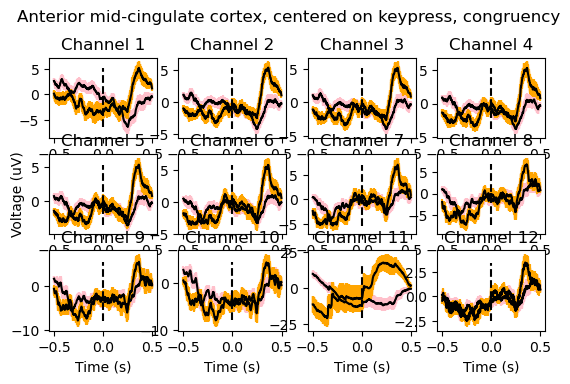

In [9]:
# Plot trials
c_stderr = np.std(trials[c_idx[:-50], :, start_time:width], axis=0) / np.sqrt(len(c_idx))
nc_stderr = np.std(trials[nc_idx[:-50], :, start_time:width], axis=0) / np.sqrt(len(nc_idx))
t = np.arange(start_time, width)/1000 if alignment == "left" else np.arange(-int(width/2), int(width/2))/1000
for i, c in enumerate(region):
    plt.subplot(dim, dim, i+1)
    plt.errorbar(t, c_trials[channels[c]], yerr=c_stderr[channels[c]], label="congruent", ecolor='pink', fmt='k')
    plt.errorbar(t, nc_trials[channels[c]], yerr=nc_stderr[channels[c]], label="incongruent", ecolor='orange', fmt='k')
    y_max = max(max(c_trials[channels[c]]), max(nc_trials[channels[c]]))
    y_min = min(min(c_trials[channels[c]]), min(nc_trials[channels[c]]))
    plt.plot([0, 0], [y_min, y_max], 'k--')

    # Plot labeling
    if i == 4:
        plt.ylabel("Voltage (uV)")
    plt.title('Channel ' + str(i + 1))
    plt.xticks(fontsize=10, rotation=0)
    plt.yticks(fontsize=10, rotation=0)
    plt.xlabel("Time (s)")

plt.suptitle("Anterior mid-cingulate cortex, centered on keypress, congruency")  # FIXME: NEEDS TO BE MANUALLY CHANGED
plt.show()


# Reaction Times and T-Tests

In [10]:
#Create the dataframe
df_pt8 = pd.read_csv('p8_behavior_center1000_key.csv')
df_pt9 = pd.read_csv('p9_behavior_center1000_key.csv')
df_pt10 = pd.read_csv('p10_behavior_center1000_key.csv')
df_pt11 = pd.read_csv('p11_behavior_center1000_key.csv')
df_pt12 = pd.read_csv('p12_behavior_center1000_key.csv')

# List to hold DataFrames
dataframes = []
dataframes.append(df_pt8)
dataframes.append(df_pt9)
dataframes.append(df_pt10)
dataframes.append(df_pt11)
dataframes.append(df_pt12)

augmented_df = pd.concat(dataframes, ignore_index=True)
augmented_df.to_csv('augmented_behavior_datafile.csv', index=False)
augmented_df = augmented_df.drop('Unnamed: 0', axis=1)

#String-to-float conversion method
def time_string_to_seconds(time_str):
    if time_str.count(':') == 2:
        # Format HH:MM:SS.SSSS
        h, m, s = map(float, time_str.split(':'))
        return h * 3600 + m * 60 + s
    elif time_str.count(':') == 1:
        # Format MM:SS.S
        m, s = map(float, time_str.split(':'))
        return m * 60 + s
    else:
        raise ValueError("Time format not recognized")
    

#Adding reaction times column to dataframe
augmented_df['stim_time_seconds'] = augmented_df['stim_time'].apply(time_string_to_seconds)
augmented_df['stim_time_seconds'] = augmented_df['stim_time_seconds'].astype('float64')
augmented_df['key_time_seconds'] = augmented_df['key_time'].apply(time_string_to_seconds)
augmented_df['key_time_seconds'] = augmented_df['key_time_seconds'].astype('float64')

augmented_df['reaction_time'] = augmented_df['key_time_seconds'] - augmented_df['stim_time_seconds']
augmented_df['reaction_time'] = augmented_df['reaction_time'].astype('float64')

In [26]:
#Two-sample t-test of ISIs in congruent and non congruent trials
from datetime import datetime
from scipy import stats
from scipy.stats import f_oneway

c = augmented_df[(augmented_df['congruent'] == 1)]
nc = augmented_df[(augmented_df['congruent'] == 0)]

#c1 = (c['key_time']).to_numpy()
#c2 = (c['stim_time']).to_numpy()
#nc1 = (nc['key_time']).to_numpy()
#nc2 = (nc['stim_time']).to_numpy()

con_isi = c['isi']
noncon_isi = nc['isi']

t_stat, p_value = stats.ttest_ind(con_isi, noncon_isi)
alpha = 0.05

print(p_value)
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in interspike intervals between congruent and incongruent trials")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in interspike intervals between congruent and incongruent trials")

#Two-sample t-test of Responses in congruent and non congruent trials
print()
con_resp = c['response']
noncon_resp = nc['response']

t_stat1, p_value1 = stats.ttest_ind(con_resp, noncon_resp)
alpha = 0.05

print(p_value1)
if p_value1 < alpha:
    print("Reject the null hypothesis. There is a significant difference in responses between congruent and incongruent trials")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in responses between congruent and incongruent trials")


#Two-sample t-test of reaction times in congruent and non congruent trials
print()

con_rt = c['reaction_time']
noncon_rt = nc['reaction_time']
c_sum = 0
x=0
nc_sum = 0
y=0

for i in range(len(augmented_df)):
    if augmented_df['congruent'].iloc[i] == 1:
        c_sum+=augmented_df['reaction_time'].iloc[i]
        x+=1
    elif augmented_df['congruent'].iloc[i] == 0:
        nc_sum+=augmented_df['reaction_time'].iloc[i]
        y+=1

mean_con_rt = c_sum/x
mean_noncon_rt = nc_sum/y

print(mean_con_rt)
print(mean_noncon_rt)

t_stat2, p_value2 = stats.ttest_ind(con_rt, noncon_rt)
alpha = 0.05

print(p_value2)
if p_value2 < alpha:
    print("Reject the null hypothesis. There is a significant difference in reaction times between congruent and incongruent trials")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in reaction times between congruent and incongruent trials")

0.7434618703331013
Fail to reject the null hypothesis. There is no significant difference in interspike intervals between congruent and incongruent trials

6.048636373359575e-16
Reject the null hypothesis. There is a significant difference in responses between congruent and incongruent trials

1.190937168478343
1.363040023972806
0.00016209044796580867
Reject the null hypothesis. There is a significant difference in reaction times between congruent and incongruent trials


# Gratton Effect Analysis

In [ ]:
behavior_df['stim_time_seconds'] = behavior_df['stim_time'].apply(time_string_to_seconds)
behavior_df['stim_time_seconds'] = behavior_df['stim_time_seconds'].astype('float64')
behavior_df['key_time_seconds'] = behavior_df['key_time'].apply(time_string_to_seconds)
behavior_df['key_time_seconds'] = behavior_df['key_time_seconds'].astype('float64')

behavior_df['reaction_time'] = behavior_df['key_time_seconds'] - behavior_df['stim_time_seconds']
behavior_df['reaction_time'] = behavior_df['reaction_time'].astype('float64')

In [39]:
#NC->C
con_sum = 0.0
noncon_sum = 0.0
con_arr = np.array([])
noncon_arr = np.array([])
for i in range(len(behavior_df)-1):
    if behavior_df['congruent'].iloc[i] != behavior_df['congruent'].iloc[i+1]:
        if behavior_df['congruent'].iloc[i+1] == 1: #nc->c
            con_sum += behavior_df['reaction_time'].iloc[i+1]
            con_arr = np.append(con_arr, behavior_df['reaction_time'].iloc[i+1])
            noncon_sum += behavior_df['reaction_time'].iloc[i]
            noncon_arr = np.append(noncon_arr, behavior_df['reaction_time'].iloc[i])
           
print(con_sum)
print(noncon_sum)

t_stat, p_value = stats.ttest_ind(con_arr, noncon_arr)
alpha = 0.05

print(p_value)
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in reaction times for congruent trials preceded by incongruent trials")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in reaction times for congruent trials preceded by incongruent trials")

#One-way ANOVA
f_oneway(con_arr, noncon_arr)

91.25117999997792
108.24370000000613
0.016176948402098226
Reject the null hypothesis. There is a significant difference in reaction times for congruent trials preceded by incongruent trials


F_onewayResult(statistic=5.9020332257196255, pvalue=0.01617694840209801)

In [40]:
#C->NC
con_sum = 0.0
noncon_sum = 0.0
con_arr = np.array([])
noncon_arr = np.array([])
for i in range(len(behavior_df)-1):
    if behavior_df['congruent'].iloc[i] != behavior_df['congruent'].iloc[i+1]:
        if behavior_df['congruent'].iloc[i+1] == 0: 
            con_sum += behavior_df['reaction_time'].iloc[i]
            con_arr = np.append(con_arr, behavior_df['reaction_time'].iloc[i])
            noncon_sum += behavior_df['reaction_time'].iloc[i+1]
            noncon_arr = np.append(noncon_arr, behavior_df['reaction_time'].iloc[i+1])
      
print(con_sum)
print(noncon_sum)

t_stat, p_value = stats.ttest_ind(con_arr, noncon_arr)
alpha = 0.05

print(p_value)
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in reaction times for incongruent trials preceded by congruent trials")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in reaction times for incongruent trials preceded by congruent trials")

#One-way ANOVA
f_oneway(con_arr, noncon_arr)

93.44150000002105
107.53336999999442
0.023041659123270802
Reject the null hypothesis. There is a significant difference in reaction times for incongruent trials preceded by congruent trials


F_onewayResult(statistic=5.260280568951275, pvalue=0.023041659123270775)

In [41]:
#C->C
con_sum = 0.0
con_sum2 = 0.0
con_arr = np.array([])
con_arr2 = np.array([])
for i in range(len(behavior_df)-1):
    if behavior_df['congruent'].iloc[i] == behavior_df['congruent'].iloc[i+1]:
        if behavior_df['congruent'].iloc[i+1] == 1: 
            con_sum += behavior_df['reaction_time'].iloc[i]
            con_arr = np.append(con_arr, behavior_df['reaction_time'].iloc[i])
            con_sum2 += behavior_df['reaction_time'].iloc[i+1]
            con_arr2 = np.append(noncon_arr, behavior_df['reaction_time'].iloc[i+1])
            
print(con_sum)
print(con_sum2)

t_stat, p_value = stats.ttest_ind(con_arr, con_arr2)
alpha = 0.05

print(p_value)
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in reaction times for congruent trials preceded by congruent trials")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in reaction times for congruent trials preceded by congruent trials")

#One-way ANOVA
f_oneway(con_arr, con_arr2)

118.60447999996563
111.99480000000881
0.8533811059028806
Fail to reject the null hypothesis. There is no significant difference in reaction times for congruent trials preceded by congruent trials


F_onewayResult(statistic=0.03425266700175189, pvalue=0.8533811059029259)

In [42]:
#NC->NC
noncon_sum = 0.0
noncon_sum2 = 0.0
noncon_arr = np.array([])
noncon_arr2 = np.array([])
for i in range(len(behavior_df)-1):
    if behavior_df['congruent'].iloc[i] == behavior_df['congruent'].iloc[i+1]:
        if behavior_df['congruent'].iloc[i+1] == 0: 
            noncon_sum += behavior_df['reaction_time'].iloc[i]
            noncon_arr = np.append(con_arr, behavior_df['reaction_time'].iloc[i])
            noncon_sum2 += behavior_df['reaction_time'].iloc[i+1]
            noncon_arr2 = np.append(noncon_arr, behavior_df['reaction_time'].iloc[i+1])
            
print(noncon_sum)
print(noncon_sum2)

t_stat, p_value = stats.ttest_ind(noncon_arr, noncon_arr2)
alpha = 0.05

print(p_value)
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in reaction times for incongruent trials preceded by incongruent trials")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in reaction times for incongruent trials preceded by incongruent trials")

#One-way ANOVA
f_oneway(noncon_arr, noncon_arr2)

58.563159999998106
59.834390000013855
0.9727336939291483
Fail to reject the null hypothesis. There is no significant difference in reaction times for incongruent trials preceded by incongruent trials


F_onewayResult(statistic=0.0011713971629129236, pvalue=0.9727336939291373)

In [14]:
import pandas as pd
from datetime import datetime
import scipy.stats as stats
from scipy.stats import ttest_ind
import csv

file_path = csv_path
behavioral_data = pd.read_csv(file_path)

# groups:
# 1 = CC -> CC
# 2 = CC -> IC
# 3 = IC -> IC
# 4 = IC -> CC


def consistent():
    row_indices = behavioral_data.index
    congruent_column = behavioral_data['congruent']
    for i in row_indices:
        if i != 0:
            if congruent_column.iat[i] == 0:
                if congruent_column.iat[i-1] == 0:
                    behavioral_data.loc[i, 'consistent'] = 3
                elif congruent_column.iat[i-1] == 1:
                    behavioral_data.loc[i, 'consistent'] = 4
            if congruent_column.iat[i] == 1:
                if congruent_column.iat[i-1] == 0:
                    behavioral_data.loc[i, 'consistent'] = 2
                elif congruent_column.iat[i-1] == 1:
                    behavioral_data.loc[i, 'consistent'] = 1


def calculate_reaction_time(stimulus_onset_str, response_time_str):
    # Define the format of the time strings
    time_format = "%H:%M:%S.%f"

    # Convert time strings to datetime objects
    stimulus_onset = datetime.strptime(stimulus_onset_str, time_format)
    response_time = datetime.strptime(response_time_str, time_format)

    # Calculate the reaction time as a timedelta object
    reaction_time = response_time - stimulus_onset
    reaction_time = reaction_time.total_seconds()

    return reaction_time


def create_rt_column():
    row_indices = behavioral_data.index
    stim_onset = behavioral_data['stim_time']
    response_time = behavioral_data['key_time']
    for i in row_indices:
        behavioral_data.loc[i, 'reaction time'] = calculate_reaction_time(stim_onset.iat[i], response_time.iat[i])

consistent()
create_rt_column()
behavioral_data = behavioral_data.groupby('consistent')

df = pd.DataFrame(behavioral_data)



# ANOVA
group1 = behavioral_data.get_group(1.0)
group2 = behavioral_data.get_group(2.0)
group3 = behavioral_data.get_group(3.0)
group4 = behavioral_data.get_group(4.0)

group_cc_cc = group1['reaction time']
group_cc_ic = group2['reaction time']
group_ic_ic = group3['reaction time']
group_ic_cc = group4['reaction time']
mean_cc_cc = group_cc_cc.mean()
mean_cc_ic = group_cc_ic.mean()
mean_ic_ic = group_ic_ic.mean()
mean_ic_cc = group_ic_cc.mean()
print(mean_cc_cc)
print(mean_cc_ic)
print(mean_ic_ic)
print(mean_ic_cc)


f_value, p_value = stats.f_oneway(group_cc_cc, group_cc_ic, group_ic_ic, group_ic_cc)

print(f"F-value: {f_value}")
print(f"P-value: {p_value}")

1.0887043440860216
1.00578435
1.2078615384615383
1.3127812345679013
F-value: 4.319922419314239
P-value: 0.005282151170035892
